In [1]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Column Names (['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link'],  dtype='object')
fullDataset = pd.read_csv("C:\\Repos\\MastersProject\\data-analysis\\Data\\amazon.csv", delimiter=",")

fullUserData = pd.read_csv("C:\\Repos\\MastersProject\\data-analysis\\Data\\userInfo.csv", delimiter=",")

In [3]:
# ignore the columns that are not needed
products_dataset = fullDataset [
    [
        "product_id",
        "product_name",
        "category",
        "actual_price",
        "img_link",
        "product_link",
        "about_product",
        "rating",
        "rating_count"   
    ]
]
        
products_dataset.rename(columns={
    "actual_price": 'price',
    "about_product":'product_description',
    "rating_count":'no_of_ratings'
},inplace=True)


#df['Salary'].str.replace(',', '').str.replace('₹', '').astype(int)
products_dataset['no_of_ratings'] = products_dataset['no_of_ratings'].str.replace('[,]','', regex=True).astype(int)        
products_dataset['rating'] = (products_dataset['rating'].astype(float)).round(1)
products_dataset['price'] = (products_dataset['price'].str.replace('[\₹\,]','', regex=True).astype(float) / 80).round(2)
products_dataset["category"] = products_dataset["category"].str.split("|") 

products_dataset.drop_duplicates(subset=['product_id'], inplace=True)

C:\Users\srile\AppData\Local\Temp\ipykernel_22376\2941702700.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_dataset.rename(columns={
C:\Users\srile\AppData\Local\Temp\ipykernel_22376\2941702700.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_dataset['no_of_ratings'] = products_dataset['no_of_ratings'].str.replace('[,]','', regex=True).astype(int)
C:\Users\srile\AppData\Local\Temp\ipykernel_22376\2941702700.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [4]:
review_dataset = fullDataset[
    [
        "review_id",
        "review_title",
        "review_content",
        "user_id",
        "product_id"
    ]
]
                
review_dataset["product_id"] = fullDataset["product_id"]
review_dataset["user_id"] = fullDataset["user_id"].str.split(",")
review_dataset["review_id"] = fullDataset["review_id"].str.split(",")
review_dataset["review_title"] = fullDataset["review_title"].str.split(",")
review_dataset["review_content"] = fullDataset["review_content"].str.split(",")

review_dataset.drop_duplicates(subset=['product_id'], inplace=True)

temp_review_df = pd.DataFrame(columns = ['product_id','user_id','review_id','review_title','review_content'])

for index, row in review_dataset.iterrows():
    limit = len(row['user_id'])
    pid = row['product_id']
    #print(limit)
    for index in range(limit):
        temp_review_df.loc[len(temp_review_df)]=[pid,row['user_id'][index],row['review_id'][index],row['review_title'][index],row['review_content'][index]]

temp_review_df.drop_duplicates(subset=['review_id'], inplace=True)

C:\Users\srile\AppData\Local\Temp\ipykernel_22376\206186806.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_dataset["product_id"] = fullDataset["product_id"]
C:\Users\srile\AppData\Local\Temp\ipykernel_22376\206186806.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_dataset["user_id"] = fullDataset["user_id"].str.split(",")
C:\Users\srile\AppData\Local\Temp\ipykernel_22376\206186806.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [5]:
users_id_dataset = fullDataset[
    [
        "user_id"
    ]
]
users_id_dataset["user_id"] = users_id_dataset["user_id"].str.split(",")
users_json_dataset = users_id_dataset.to_dict(orient='records')

userId_df = pd.DataFrame(columns = ['user_id'])

for index, row in users_id_dataset.iterrows():
    for itemData in row["user_id"]:
        userId_df.loc[len(userId_df)]=[itemData]
        
userId_df

first_names=fullUserData["fname"].tolist()
last_names=fullUserData["lname"].tolist()
phoneNo=fullUserData["phoneNo"].tolist()

userId_df["fname"] = np.random.choice(first_names, size=len(userId_df))
userId_df["lname"] = np.random.choice(last_names, size=len(userId_df))
userId_df["phoneNo"] = np.random.choice(phoneNo, size=len(userId_df))

userId_df.drop_duplicates(subset=['user_id'], inplace=True)
users_dataset = userId_df

C:\Users\srile\AppData\Local\Temp\ipykernel_22376\547040528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_id_dataset["user_id"] = users_id_dataset["user_id"].str.split(",")


In [6]:
New_Product_Rating_Dataset = pd.merge(products_dataset,temp_review_df,on="product_id") 
        
New_Product_Rating_Dataset = pd.merge(New_Product_Rating_Dataset,users_dataset,on="user_id")

Product_Description_Dataset = New_Product_Rating_Dataset[["product_id","product_name"]]

Product_Description_Dataset.drop_duplicates()
Product_Description_Dataset["product_name"].drop_duplicates()
Product_Description_Dataset.drop_duplicates(subset=['product_id'], inplace=True)

Product_Description_Dataset

C:\Users\srile\AppData\Local\Temp\ipykernel_22376\3870570323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Product_Description_Dataset.drop_duplicates(subset=['product_id'], inplace=True)


,product_id,product_name
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...
8,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, T..."
9,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
10,B07PFJ5VQD,Agaro Blaze USBA to micro +Type C 2in1 Braided...
11,B07TCN5VR9,Boult Audio BassBuds X1 in-Ear Wired Earphones...
...,...,...
9217,B07J9KXQCC,"Libra Room Heater for Home, Room Heaters Home ..."
9225,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...
9226,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...
9234,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...


# Recommendation Logic

In [7]:
#Product_Description_Dataset_Temp = Product_Description_Dataset["product_name"].drop_duplicates()
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(Product_Description_Dataset["product_name"])

# Plotting (Not needed)

C:\Users\srile\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


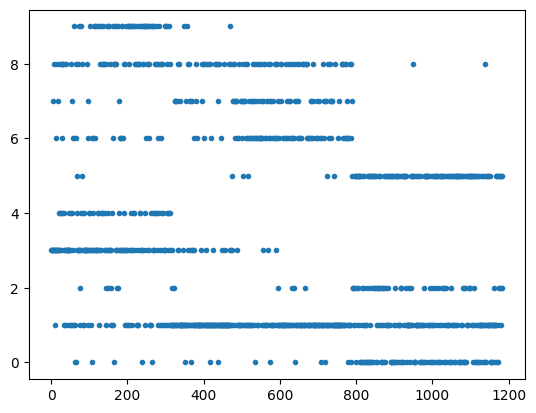

In [8]:
X=X1
k_means = KMeans(n_clusters = 10, init = 'k-means++')
y_k_means = k_means.fit_predict(X)
plt.plot(y_k_means, ".")

In [9]:
Product_Description_Dataset

,product_id,product_name
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...
8,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, T..."
9,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
10,B07PFJ5VQD,Agaro Blaze USBA to micro +Type C 2in1 Braided...
11,B07TCN5VR9,Boult Audio BassBuds X1 in-Ear Wired Earphones...
...,...,...
9217,B07J9KXQCC,"Libra Room Heater for Home, Room Heaters Home ..."
9225,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...
9226,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...
9234,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...


In [10]:
RecommendedUserProducts = pd.DataFrame(columns=['product_id','product_name','RecommendedUserList'])

def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

def print_prediction(prediction):
    print("Prediction %d:" % prediction),
    for idx, j in enumerate(prediction):
        print(idx, j, prediction)
    print

# predicting cluster based on the key search words
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print(type(prediction))
    print_prediction(prediction)
    # print_cluster(prediction[0])
    
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
# for i in range(true_k):
#     print_cluster(i)    

In [11]:
show_recommendations("Libra Room")

<class 'numpy.ndarray'>
Prediction 1:
0 1 [1]


In [12]:
for indexNum, rowData in Product_Description_Dataset.iterrows():
    productId = rowData['product_id']
    productName = rowData['product_name'] #.partition(' ')[0]
    Y = vectorizer.transform([productName])
    prediction = model.predict(Y)
    #print(prediction)
    #print_cluster(prediction[0])
    #a_str = ','.join(str(x) for x in prediction) # '0,3,5'
    Recommended_user_product = np.fromstring(prediction.tostring(),dtype=int)
    RecommendedUserProducts.loc[len(RecommendedUserProducts.index)] = [productId,productName,Recommended_user_product]

RecommendedUserProducts_dataset = RecommendedUserProducts.to_dict(orient='records')

C:\Users\srile\AppData\Local\Temp\ipykernel_22376\790259112.py:9: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  Recommended_user_product = np.fromstring(prediction.tostring(),dtype=int)
C:\Users\srile\AppData\Local\Temp\ipykernel_22376\790259112.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  Recommended_user_product = np.fromstring(prediction.tostring(),dtype=int)
C:\Users\srile\AppData\Local\Temp\ipykernel_22376\790259112.py:9: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  Recommended_user_product = np.fromstring(prediction.tostring(),dtype=int)
C:\Users\srile\AppData\Local\Temp\ipykernel_22376\790259112.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  Recommended_user_product = np.fromstring(prediction.tostring(),dtype=int)
C:\Users\srile\AppData\Loc

In [13]:
RecommendedUserProducts_dataset

[{'product_id': 'B07JW9H4J1',
  'product_name': 'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)',
  'RecommendedUserList': array([2])},
 {'product_id': 'B097C564GC',
  'product_name': 'rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver',
  'RecommendedUserList': array([2])},
 {'product_id': 'B098NS6PVG',
  'product_name': 'Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)',
  'RecommendedUserList': array([2])},
 {'product_id': 'B07PFJ5VQD',
  'product_name': 'Agaro Blaze USBA to micro +Type C 2in1 Braided 1.2M Cable',
  'RecommendedUserList': array([2])},
 {'product_id': 'B07TCN5VR9',
  'pro

# Deep Auto Encoders

In [14]:
#pip install git+https://github.com/tensorflow/docs

In [15]:
#import packages
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import initializers
from keras import callbacks
import tensorflow_docs as tfdocs   
import tensorflow_docs.modeling   
import tensorflow_docs.plots
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [16]:
# Autoencoder Model Function 
def autoencoder(X):
    # data entry
    entry = Input(shape=(X.shape[1],), name='Customer')

    # Encoder
    encoder = Dense(256, activation='selu', name='EncoderLayer')(entry)

    # Latent Space
    latente_space = Dense(128, activation='selu',  name='LatenteSpace')(encoder)
    latente_space = Dropout(0.3, name='Dropout')(latente_space) # Dropout

    # Decoder
    decoder = Dense(256, activation='selu', name='DecLayer1')(latente_space)

    # Output
    output_layer = Dense(X.shape[1], activation='linear', name='CustomerPrediction')(decoder)

    # this model maps the entry to make its reconstruction
    model = Model(entry, output_layer)    

    return model
